# Day 1





| Exercise | Requires coding | What to code (if anything) | What should you learn (or practice)    | Done it! |
|----------|-----------------|----------------------------|----------------------------------------|----------|
| 1.1      | Yes             | Naive Bayes                | Naive Bayes                            | No       |
| 1.2      | No              |                            | Perceptron                             | No       |
| 1.3      | No              |                            | MIRA                                   | No       |
| 1.4      | No              |                            | Maximum Entropy                        | No       |
| 1.5      | Yes             | SVM                        | SVM                                    | No       |
| 1.6      | No              |                            | Impact of Amount of data in the models | No       |




# Generative classifiers



In [55]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import sys
# We will this append to ensure we can import lxmls toolking
sys.path.append('../lxmls-toolkit')

In [168]:
import lxmls.readers.sentiment_reader as srs
import lxmls.classifiers.naive_bayes as nb

## Exercise 1.1 

In this exercise we will use the Amazon sentiment analysis data (?), where the goal is to classify text documents as expressing a positive or negative sentiment (i.e., a classification problem with two classes). We are going to focus on book reviews. To load the data, type

In [173]:
scr = srs.SentimentCorpus("books")

2000
1600


In [174]:
len(scr.feat_dict)

13989

In [48]:
scr.train_X.shape, scr.train_y.shape

((1600, 13989), (1600, 1))

In [49]:
scr.test_X.shape,  scr.test_y.shape

((400, 13989), (400, 1))

This will load the data in a bag-of-words representation where rare words (occurring less than 5 times in the training data) are removed.

####  Part 1
<font color='red'>**Implement the Naıve Bayes algorithm. Open the file multinomial naive bayes.py, which is inside the classifiers folder**</font>. In the MultinomialNaiveBayes class you will find the train method. We have already placed some code in that file to help you get started.

#### Part 2
After implementing, run NaıveBayes with the multinomial model on the Amazon dataset(sentiment classification) and report results both for training and testing:

In [50]:
import lxmls.classifiers.multinomial_naive_bayes as mnbb
mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y)
y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)
y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)

print "Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(
      acc_train,acc_test)

Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.987500 test: 0.635000


##### Part 3
Observe that words that were not observed at training time cause problems at test time. Why? To solve this problem, apply a simple add-one smoothing technique: replace the expression in Eq. 1.9 for the estimation of the conditional probabilities by 


where J is the number of distinct words.

This is a widely used smoothing strategy which has a Bayesian interpretation: it corresponds to choosing a uniform prior for the word distribution on both classes, and to replace the maximum likelihood criterion by a maximum a posteriori approach. This is a form of regularization, preventing the model from overfitting on the training data. See e.g. ??) for more information. Report the new accuracies.



# Discriminative Classifiers

## Exercise 1.2



In [67]:
import lxmls.readers.simple_data_set as sds
sd = sds.SimpleDataSet(nr_examples=100, g1 = [[-1,-1],1], g2 = [[1,1],1],
                       balance=0.5,split=[0.5,0,0.5])

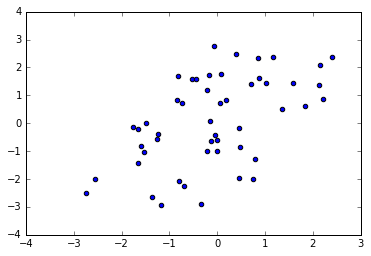

In [68]:
plt.scatter(sd.train_X[:,0],sd.train_X[:,1])

### 1.2.2

Run the perceptron algorithm on the simple dataset previously generated and report its train and test set accuracy:

In [119]:
import lxmls.classifiers.perceptron as percc
perc = percc.Perceptron()

In [120]:
params_perc_sd = perc.train(sd.train_X, sd.train_y)
y_pred_train = perc.test(sd.train_X,params_perc_sd)
acc_train = perc.evaluate(sd.train_y, y_pred_train)
y_pred_test = perc.test(sd.test_X,params_perc_sd)
acc_test = perc.evaluate(sd.test_y, y_pred_test)
print "Perceptron Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)

Rounds: 0 Accuracy: 0.920000
Rounds: 1 Accuracy: 0.900000
Rounds: 2 Accuracy: 0.920000
Rounds: 3 Accuracy: 0.900000
Rounds: 4 Accuracy: 0.920000
Rounds: 5 Accuracy: 0.920000
Rounds: 6 Accuracy: 0.640000
Rounds: 7 Accuracy: 0.940000
Rounds: 8 Accuracy: 0.900000
Rounds: 9 Accuracy: 0.920000
Perceptron Simple Dataset Accuracy train: 0.940000 test: 0.880000


### 1.2.3

Plot the decision boundary foun.

Change the code to save the intermediate weight vectors, and plot them every five iterations. What do you observe?

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


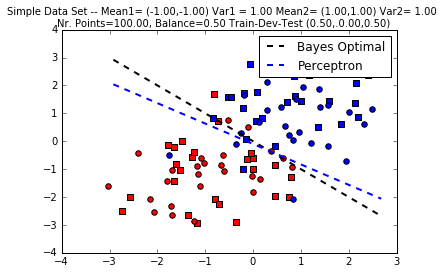

In [121]:
fig,axis = sd.plot_data()
fig,axis = sd.add_line(fig,axis,params_perc_sd,"Perceptron","blue")

### 1.2.4

Run the perceptron algorithm on the Amazon dataset.

In [78]:
perc = percc.Perceptron()

params_nb_sc = perc.train(scr.train_X,scr.train_y)
y_pred_train = perc.test(scr.train_X,params_nb_sc)
acc_train = perc.evaluate(scr.train_y, y_pred_train)
y_pred_test = perc.test(scr.test_X,params_nb_sc)
acc_test = perc.evaluate(scr.test_y, y_pred_test)

print "Perceptron Amazon Sentiment Accuracy train: %f test: %f"\
       %(acc_train,acc_test)

Rounds: 0 Accuracy: 0.870000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.979375
Rounds: 3 Accuracy: 0.965625
Rounds: 4 Accuracy: 0.989375
Rounds: 5 Accuracy: 0.996250
Rounds: 6 Accuracy: 0.995000
Rounds: 7 Accuracy: 0.999375
Rounds: 8 Accuracy: 0.996250
Rounds: 9 Accuracy: 0.998125
Perceptron Amazon Sentiment Accuracy train: 0.998750 test: 0.825000


## Exercise 1.3
We provide an implementation of the MIRA algorithm.
Compare it with the perceptron for various values of λ


In [167]:
import lxmls.classifiers.mira as mirac

train_X = sd.train_X
train_y = sd.train_y
test_X  = sd.test_X
test_y  = sd.test_y

reg = 0.1

mira = mirac.Mira()
mira.regularizer = reg 
    
    
# train the model
print "\tTraining model with Lambda: %f"%(reg) 
params_mira_sc = mira.train(train_X, train_y)

# evaluate train
y_pred_train = mira.test(train_X, params_mira_sc)
acc_train = mira.evaluate(train_y, y_pred_train)

# evaluate test
y_pred_test = mira.test(test_X, params_mira_sc)
acc_test = mira.evaluate(test_y, y_pred_test)

# Print results
print "\tMira Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)
print "\n\n"

	Training model with Lambda: 0.100000
Rounds: 0 Accuracy: 0.920000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.860000
Rounds: 3 Accuracy: 0.820000
Rounds: 4 Accuracy: 0.920000
Rounds: 5 Accuracy: 0.920000
Rounds: 6 Accuracy: 0.900000
Rounds: 7 Accuracy: 0.900000
Rounds: 8 Accuracy: 0.840000
Rounds: 9 Accuracy: 0.920000
	Mira Amazon Sentiment Accuracy train: 0.920000 test: 0.840000





In [135]:
import lxmls.classifiers.mira as mirac

train_X = sd.train_X
train_y = sd.train_y
test_X  = sd.test_X
test_y  = sd.test_y

regularizers = [0.1, 0.2, 0.3, 0.5, 1.]

for reg in regularizers:
    mira = mirac.Mira()
    mira.regularizer = reg 
    
    
    # train the model
    print "\tTraining model with Lambda: %f"%(reg) 
    params_mira_sc = mira.train(train_X, train_y)
    
    # evaluate train
    y_pred_train = mira.test(train_X, params_mira_sc)
    acc_train = mira.evaluate(train_y, y_pred_train)
    
    # evaluate test
    y_pred_test = mira.test(test_X, params_mira_sc)
    acc_test = mira.evaluate(test_y, y_pred_test)
    
    # Print results
    print "\tMira Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)
    print "\n\n"



	Training model with Lambda: 0.100000
Rounds: 0 Accuracy: 0.920000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.860000
Rounds: 3 Accuracy: 0.820000
Rounds: 4 Accuracy: 0.920000
Rounds: 5 Accuracy: 0.920000
Rounds: 6 Accuracy: 0.900000
Rounds: 7 Accuracy: 0.900000
Rounds: 8 Accuracy: 0.840000
Rounds: 9 Accuracy: 0.920000
	Mira Amazon Sentiment Accuracy train: 0.920000 test: 0.840000



	Training model with Lambda: 0.200000
Rounds: 0 Accuracy: 0.900000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.840000
Rounds: 3 Accuracy: 0.800000
Rounds: 4 Accuracy: 0.940000
Rounds: 5 Accuracy: 0.900000
Rounds: 6 Accuracy: 0.900000
Rounds: 7 Accuracy: 0.680000
Rounds: 8 Accuracy: 0.800000
Rounds: 9 Accuracy: 0.920000
	Mira Amazon Sentiment Accuracy train: 0.920000 test: 0.840000



	Training model with Lambda: 0.300000
Rounds: 0 Accuracy: 0.900000
Rounds: 1 Accuracy: 0.880000
Rounds: 2 Accuracy: 0.780000
Rounds: 3 Accuracy: 0.660000
Rounds: 4 Accuracy: 0.940000
Rounds: 5 Accuracy: 0.860000


Now in the Amazon dataset

In [143]:
X_train.shape

(1600, 13989)

In [149]:
import lxmls.classifiers.mira as mirac

X_train = scr.train_X
y_train = scr.train_y
X_test  = scr.test_X
y_test  = scr.test_y

regularizers = [0.1, 0.2, 0.3, 0.5, 1.]


for reg in regularizers:
    mira = mirac.Mira()
    mira.regularizer = reg 
    
    # train the model
    print "\tTraining model with Lambda: %f"%(reg) 
    params_mira_sc = mira.train(scr.train_X, scr.train_y)
    
    # evaluate train
    y_pred_train = mira.test(scr.train_X, params_mira_sc)
    acc_train = mira.evaluate(scr.train_y, y_pred_train)
    
    # evaluate test
    y_pred_test = mira.test(scr.test_X,params_mira_sc)
    acc_test = mira.evaluate(scr.test_y, y_pred_test)
    
    # Print results
    print "Mira Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)
    print "\n\n"

	Training model with Lambda: 0.100000
Rounds: 0 Accuracy: 0.707500
Rounds: 1 Accuracy: 0.740625
Rounds: 2 Accuracy: 0.743125
Rounds: 3 Accuracy: 0.811875
Rounds: 4 Accuracy: 0.770000
Rounds: 5 Accuracy: 0.810625
Rounds: 6 Accuracy: 0.843750
Rounds: 7 Accuracy: 0.868750
Rounds: 8 Accuracy: 0.890000
Rounds: 9 Accuracy: 0.868125
Mira Amazon Sentiment Accuracy train: 0.886875 test: 0.755000
	Training model with Lambda: 0.200000
Rounds: 0 Accuracy: 0.597500
Rounds: 1 Accuracy: 0.658125
Rounds: 2 Accuracy: 0.715625
Rounds: 3 Accuracy: 0.749375
Rounds: 4 Accuracy: 0.696875
Rounds: 5 Accuracy: 0.764375
Rounds: 6 Accuracy: 0.808750
Rounds: 7 Accuracy: 0.802500
Rounds: 8 Accuracy: 0.796875
Rounds: 9 Accuracy: 0.815625
Mira Amazon Sentiment Accuracy train: 0.818125 test: 0.737500
	Training model with Lambda: 0.300000
Rounds: 0 Accuracy: 0.594375
Rounds: 1 Accuracy: 0.581875
Rounds: 2 Accuracy: 0.670625
Rounds: 3 Accuracy: 0.685000
Rounds: 4 Accuracy: 0.744375
Rounds: 5 Accuracy: 0.750000
Rounds: 

## Exercise 1.4 

We provide an implementation of the L-BFGS algorithm for training maximum entropy models in the class
MaxEnt batch, as well as an implementation of the SGD algorithm in the class MaxEnt online.

### 1.4.1
Train a maximum entropy model using L-BFGS on the Simple data set (try different values of λ). Compare the
results with the previous methods. Plot the decision boundary.

In [155]:
import lxmls.classifiers.max_ent_batch as mebc
me_lbfgs = mebc.MaxEntBatch()
me_lbfgs.regularizer = 1.0
params_meb_sd = me_lbfgs.train(sd.train_X,sd.train_y)
y_pred_train = me_lbfgs.test(sd.train_X,params_meb_sd)
acc_train = me_lbfgs.evaluate(sd.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(sd.test_X,params_meb_sd)
acc_test = me_lbfgs.evaluate(sd.test_y, y_pred_test)

print "Max-Ent batch Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)
fig,axis = sd.add_line(fig,axis,params_meb_sd,"Max-Ent-Batch","orange")

Objective = 0.69314718056
Objective = 0.744562300061
Objective = 0.481189675634
Objective = 0.481131767079
Objective = 0.481124374915
Objective = 0.481124335051
Objective = 0.48112433463
Max-Ent batch Simple Dataset Accuracy train: 0.920000 test: 0.900000


### 1.4.2

Train a maximum entropy model using L-BFGS, on the Amazon dataset (try different values of λ) and report training and test set accuracy. What do you observe?

In [156]:
params_meb_sc = me_lbfgs.train(scr.train_X,scr.train_y)
y_pred_train = me_lbfgs.test(scr.train_X,params_meb_sc)
acc_train = me_lbfgs.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(scr.test_X,params_meb_sc)
acc_test = me_lbfgs.evaluate(scr.test_y, y_pred_test)
print "Max-Ent Batch Amazon Sentiment Accuracy train: %f test: %f"%(acc_train, acc_test)

Objective = 0.69314718056
Objective = 2.35699359189
Objective = 0.684446278348
Objective = 0.662465339727
Objective = 0.636905088298
Objective = 0.627955556207
Objective = 0.62428542661
Objective = 0.622621016561
Objective = 0.622511818322
Objective = 0.622432543872
Objective = 0.622409822693
Objective = 0.622403500619
Objective = 0.622402924504
Objective = 0.622402796132
Objective = 0.622402787594
Objective = 0.622402780959
Objective = 0.622402796062
Objective = 0.622402779848
Max-Ent Batch Amazon Sentiment Accuracy train: 0.858125 test: 0.790000


### 1.4.3

Now, fix λ = 1.0 and train with SGD (you might try to adjust the initial step). Compare the objective values
obtained during training with those obtained with L-BFGS. What do you observe?

In [157]:
import lxmls.classifiers.max_ent_online as meoc
me_sgd = meoc.MaxEntOnline()
me_sgd.regularizer = 1.0
params_meo_sc = me_sgd.train(scr.train_X,scr.train_y)
y_pred_train = me_sgd.test(scr.train_X,params_meo_sc)
acc_train = me_sgd.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_sgd.test(scr.test_X,params_meo_sc)
acc_test = me_sgd.evaluate(scr.test_y, y_pred_test)
print "Max-Ent Online Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,
acc_test)


Epochs: 0 Objective: 1.169629
Epochs: 0 Accuracy: 0.821875
Epochs: 1 Objective: 0.646076
Epochs: 1 Accuracy: 0.850000
Epochs: 2 Objective: 0.635095
Epochs: 2 Accuracy: 0.861250
Epochs: 3 Objective: 0.631180
Epochs: 3 Accuracy: 0.860000
Epochs: 4 Objective: 0.629128
Epochs: 4 Accuracy: 0.861875
Epochs: 5 Objective: 0.627862
Epochs: 5 Accuracy: 0.861250
Epochs: 6 Objective: 0.627001
Epochs: 6 Accuracy: 0.861250
Epochs: 7 Objective: 0.626376
Epochs: 7 Accuracy: 0.860625
Epochs: 8 Objective: 0.625902
Epochs: 8 Accuracy: 0.860625
Epochs: 9 Objective: 0.625529
Epochs: 9 Accuracy: 0.860625
Max-Ent Online Amazon Sentiment Accuracy train: 0.860625 test: 0.787500


## Exercise 1.5

Implement the SVM primal algorithm (Hint: look at the models implemented earlier, you should only need to change a few lines of code). Do this by creating a file SVM.py and implement class SVM. Then, repeat the MaxEnt exercise now using SVMs, for several values of λ:

In [158]:
import lxmls.classifiers.svm as svmc
svm = svmc.SVM()
svm.regularizer = 1.0 # This is lambda
params_svm_sd = svm.train(sd.train_X,sd.train_y)
y_pred_train = svm.test(sd.train_X,params_svm_sd)
acc_train = svm.evaluate(sd.train_y, y_pred_train)
y_pred_test = svm.test(sd.test_X,params_svm_sd)
acc_test = svm.evaluate(sd.test_y, y_pred_test)
print "SVM Online Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)

Epochs: 0 Objective: 0.525850
Epochs: 0 Accuracy: 0.900000
Epochs: 1 Objective: 0.425950
Epochs: 1 Accuracy: 0.900000
Epochs: 2 Objective: 0.417487
Epochs: 2 Accuracy: 0.900000
Epochs: 3 Objective: 0.417623
Epochs: 3 Accuracy: 0.900000
Epochs: 4 Objective: 0.415028
Epochs: 4 Accuracy: 0.900000
Epochs: 5 Objective: 0.413493
Epochs: 5 Accuracy: 0.900000
Epochs: 6 Objective: 0.412893
Epochs: 6 Accuracy: 0.900000
Epochs: 7 Objective: 0.412262
Epochs: 7 Accuracy: 0.900000
Epochs: 8 Objective: 0.411646
Epochs: 8 Accuracy: 0.900000
Epochs: 9 Objective: 0.411531
Epochs: 9 Accuracy: 0.900000
SVM Online Simple Dataset Accuracy train: 0.900000 test: 0.900000


In [159]:
fig,axis = sd.add_line(fig,axis,params_svm_sd,"SVM","orange")

In [160]:
params_svm_sc = svm.train(scr.train_X,scr.train_y)
y_pred_train = svm.test(scr.train_X,params_svm_sc)
acc_train = svm.evaluate(scr.train_y, y_pred_train)
y_pred_test = svm.test(scr.test_X,params_svm_sc)
acc_test = svm.evaluate(scr.test_y, y_pred_test)

Epochs: 0 Objective: 1.351046
Epochs: 0 Accuracy: 0.860625
Epochs: 1 Objective: 0.806764
Epochs: 1 Accuracy: 0.875000
Epochs: 2 Objective: 0.766238
Epochs: 2 Accuracy: 0.878750
Epochs: 3 Objective: 0.749538
Epochs: 3 Accuracy: 0.880000
Epochs: 4 Objective: 0.744177
Epochs: 4 Accuracy: 0.879375
Epochs: 5 Objective: 0.737206
Epochs: 5 Accuracy: 0.873125
Epochs: 6 Objective: 0.734639
Epochs: 6 Accuracy: 0.878750
Epochs: 7 Objective: 0.731872
Epochs: 7 Accuracy: 0.879375
Epochs: 8 Objective: 0.729880
Epochs: 8 Accuracy: 0.878750
Epochs: 9 Objective: 0.728291
Epochs: 9 Accuracy: 0.875000


In [162]:
print "SVM Online Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)

SVM Online Amazon Sentiment Accuracy train: 0.874375 test: 0.802500


## Exercise 1.6

Using the simple dataset run the different algorithms varying some characteristics of the data: like the number of points, variance (hence separability), class balance. Use function run all classifiers in file lab- s/run all classifiers.py which receives a dataset and plots all decisions boundaries and accuracies. What can you say about the methods when the amount of data increases? What about when the classes become too unbalanced?
